## Human Resource Analytics
Demonstration of data cleaning and problem solving using the [Human Resource Analytics data set from Kaggle](https://www.kaggle.com/cezarschroeder/human-resource-analytics-dataset/data).

### Step 1: Examine the data and plan
First, look at the data to determine a plan for cleaning and analysing it.

In [1]:
# Load the data using Pandas
import pandas as pd
df = pd.read_csv('./hr_data.csv')

In [2]:
# Check and make sure the data has loaded as expected
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'is_smoker', 'department', 'salary'],
      dtype='object')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


In [4]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low
14998,0.37,0.52,2,158.0,3.0,0,yes,0,NaN,support,low


In [5]:
# Check the number of rows - make sure we got them all
with open('./hr_data.csv') as f:
    print(len(f.read().splitlines()))

15000


In [6]:
len(df) # We expect this to be 14999 as one row is the header

14999

### Initial thoughts
Data is there as expected, though there are some columns with NaN values that need cleaning. Data for some features may also need to be converted into numeric data for analysis. 

### Check distribution and missing data
We've been asked to find patterns that could improve employee retention. We can therefore use the "left" column as a target. First step is to check the distribution of "left" and make sure we don't have missing data for the "left" column.

0


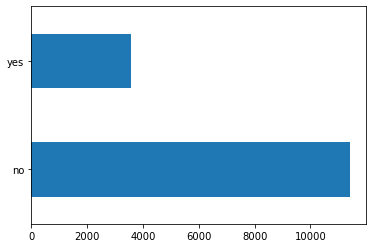

In [7]:
# Distribution - graph it
df.left.value_counts().plot(kind='barh')

# Missing data - any nulls?
print(df.left.isnull().sum())

In [8]:
# Print the datatypes of the columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company       float64
work_accident              int64
left                      object
promotion_last_5years      int64
is_smoker                 object
department                object
salary                    object
dtype: object

In [9]:
# Check proportion of NaNs
df.isnull().sum() / len(df) * 100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      2.453497
time_spend_company        1.006734
work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
is_smoker                98.433229
department                0.000000
salary                    0.000000
dtype: float64

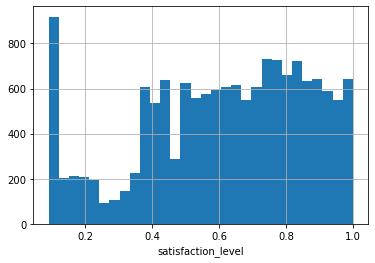

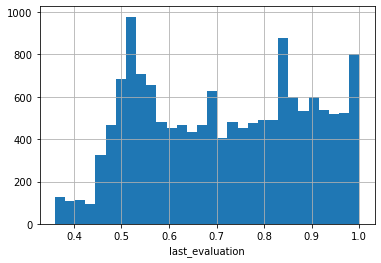

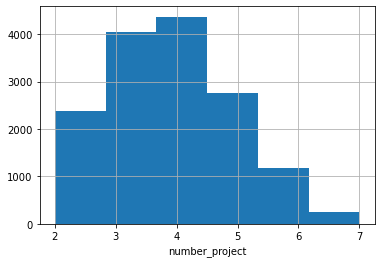

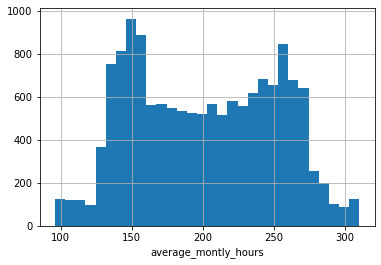

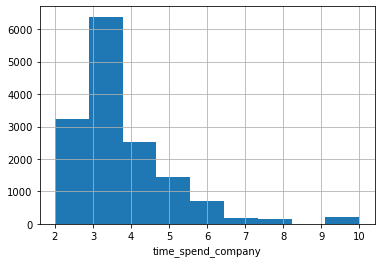

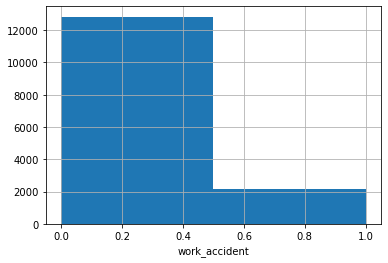

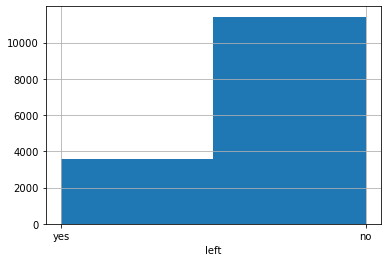

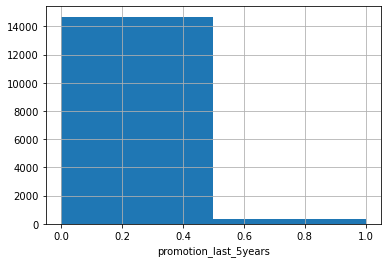

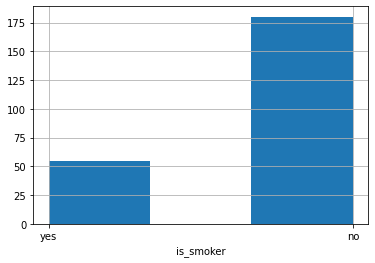

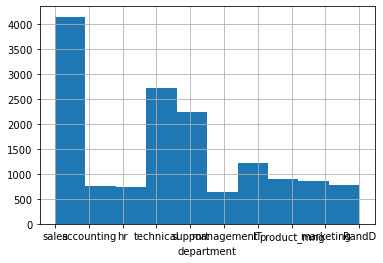

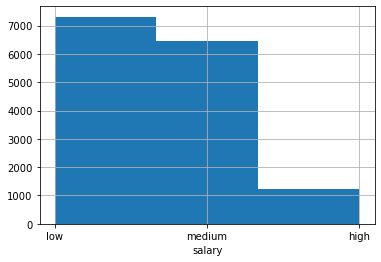

In [10]:
# Print the distibutions
import matplotlib.pyplot as plt
for f in df.columns:
    try:
        fig = plt.figure()
        num_bins = min((30, len(df[f].unique())))
        df[f].hist(bins=num_bins)
        plt.xlabel(f)
    except TypeError:
        print()
        print(df[f].value_counts())
        print('-'*30)
        plt.close()

In [11]:
# Drop the is_smoker column - we don't have enough data
del df['is_smoker']

In [12]:
# For the time_spend_company, we will fill the NaN value with the median
# This is because it's an integer field so we should use a integer value
fill_value = df.time_spend_company.median()
df.time_spend_company = df.time_spend_company.fillna(fill_value)

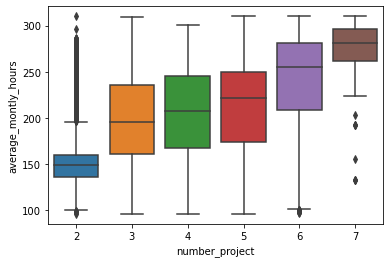

In [13]:
# Average Monthly Hours and Number Projects are related, so we can use the relationship to fill average_monthly_hours missing data

# First, make a boxplot of average_monthly_hours segmented by number_project
import seaborn as sns
sns.boxplot(x='number_project', y='average_montly_hours', data=df)

In [14]:
# We will fill in the NaNs for average_monthly_hours with the mean for
# each group, depending on the number of projects. There is an unsurprising
# correlation between hours and projects.

# Calculate fill values
mean_per_project = df.groupby('number_project').average_montly_hours.mean()
mean_per_project = dict(mean_per_project)
print(mean_per_project)

{2: 160.16353543979506, 3: 197.47882323104236, 4: 205.07858315740089, 5: 211.99962839093274, 6: 238.73947368421054, 7: 276.015873015873}


In [15]:
# Map these onto the NaNs
fill_values = df.number_project.map(mean_per_project)
df.average_montly_hours = df.average_montly_hours.fillna(fill_values)

In [16]:
# Make sure we have no NaNs left
assert df.isnull().sum().sum() == 0

In [17]:
# Last tidying step - transform string and boolean fields into integers
# 1 for yes and 0 for no
df.left = df.left.map({'no': 0, 'yes': 1})
df = pd.get_dummies(df)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [18]:
# Save the data to preprocessed CSV after checking it again
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157.000000,3.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262.000000,6.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272.000000,4.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223.000000,5.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,160.163535,3.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [19]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
14994,0.40,0.57,2,151.0,3.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160.0,3.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143.0,3.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280.0,4.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14998,0.37,0.52,2,158.0,3.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [20]:
df.to_csv('./data_hr_analytics_preprocessed.csv', index=False)

### Comments on the problem
This is a binary classification problem - we're trying to find a model to predict whether an employee will fit into the "left" or not category based on other data. 

**We will use three different models here: Support Vector Machines, Random Forests and K-Nearest Neighbours**

#### Support Vector Machines
SVMs try and find the best hyperplane to divide different the two classes by - they maximise the distance between the hyperplane and the closest samples of each class, the support vectors. 

This can be used to model non-linear classes using the kernel trick (mapping the features into a higher dimensional space in which the hyperplane is determined - this is also referred to as the decision surface and we will see it when training our models).

#### k-Nearest Neighbours
Classification algorithm memorises the training data and make predictions depending on the K nearest samples in the feature space. With 3 features, this can be shown as a sphere around the prediction sample. However, if we have more than 3 features, we need a hypersphere to find the closest K samples.

#### Random Forests
These are an ensemble of decision trees, where each decision tree was trained on a different subset of the training data. A decision tree algorithm classifies a sample using a series of decisions - e.g. feature X is less than or greater than 1. Each decision tree step should be determined based on the feature split that maximises information gain.

Training a random forest involves creating bootstrapped datasets for several decision trees. Predictions are then made by majority vote. The benefit is less overfitting and more generalisability.

**Other benefits of decision trees include that you can model a mix of continuous and categorical data, plus tree depth can be limited to reduce overfitting.** See [this StackOverflow thread](https://stackoverflow.com/a/1859910/3511819), which also describes concepts like node purity, information gain and entropy.


## Continuing on 9 July 2020

First, draw some more distribution graphs and then use the above algorithms to try find a solution to the problem. We will be training classification models using two continuous features - satisfaction_level and last_evaluation.

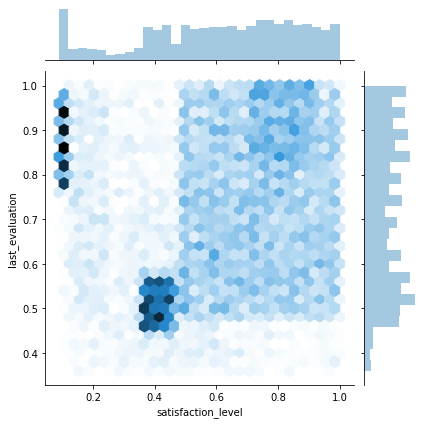

In [21]:
# Bivariate and univariate distributon graphs of satisfaction_level and last_evaluation
sns.jointplot('satisfaction_level', 'last_evaluation', data=df, kind='hex')

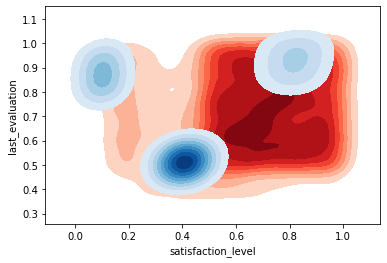

In [22]:
# Re-plot the bivariate distribution, segmenting on the target variable
plot_args = dict(shade=True, shade_lowest=False)
for i, c in zip((0, 1), ('Reds', 'Blues')):
    sns.kdeplot(df.loc[df.left==i, 'satisfaction_level'],
                df.loc[df.left==i, 'last_evaluation'],
                cmap=c, **plot_args)

#### Discussion
These graphs show some clear patterns, which can be used to train classification models. People with higher satisfaction levels tend to be less likely to leave, though there are some points in the data where the intersection of satisfaction_level and last_evaluation make leaving more likely (see blue circles).

We now need to split the data into training and test sets. We can then train models, starting with **support vector machines**.

In [23]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
features = ['satisfaction_level', 'last_evaluation']
X_train, X_test, y_train, y_test = train_test_split(df[features].values, df['left'].values,
    test_size=0.3, random_state=1)

In [24]:
# SVMs and k-Nearest Neighbours are most efficient when input data is scaled so that all the features are on the same order.
# sklearn has a StandardScaler that allows this.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
# Note that we aren't fitting the scaler on the test data - only the training data. We don't want our model training to be influeced by the test data.

In [25]:
# Import scikit-learn's SVM class and fit the model
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)
# The C parameter controls the penalty for misclassification so that variance and bias can be controlled

SVC(C=1, kernel='linear', random_state=1)

In [26]:
# Compute the accuracy of the model on unseen data
from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print('accuracy = {:.1f}%'.format(acc*100))

accuracy = 75.9%


In [27]:
# Calculate the confusion matrix and then determine the accuracy within each class
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, y_pred)
scores = cmatrix.diagonal() / cmatrix.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores[0]))
print('left = 1 : {:.2f}%'.format(scores[1]))

left = 0 : 100.00%
left = 1 : 0.00%


C:\Users\MateMalice\.conda\envs\machine-learning\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)
C:\Users\MateMalice\.conda\envs\machine-learning\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


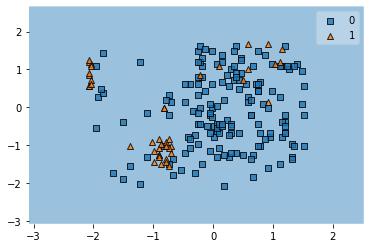

In [28]:
# The model is clearly classifying every sample as a zero, which is not helpful.
# We can use a contour plot to show the predicted calss at each feature space point
# Known as the decision-regions plot.
from mlxtend.plotting import plot_decision_regions
N_samples = 200
X, y = X_train_std[:N_samples], y_train[:N_samples]
plot_decision_regions(X, y, clf=svm)

In [29]:
# It's obvious why everything was being classified as zero given the above distribution.
# We can use a kernel trick to classify non-linear problems. Instead of using the linear kernel (above), use rbf
svm = SVC(kernel='rbf', C=1, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1, random_state=1)

total accuracy = 89.7%


predictions     
                   0    1
actual 0        3308  108
       1         354  730


percent accuracy score per class:
left = 0 : 96.84%
left = 1 : 67.34%



C:\Users\MateMalice\.conda\envs\machine-learning\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


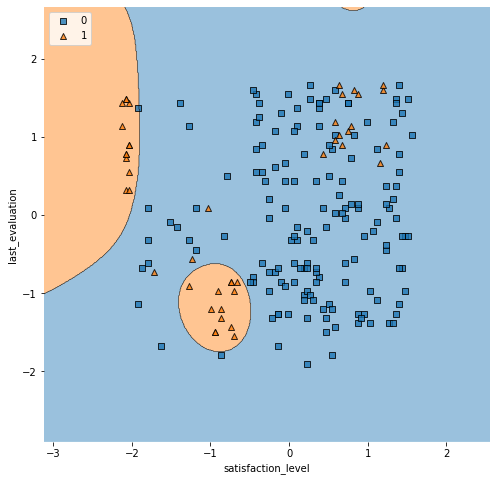

In [30]:
# Declare a function for checking model fit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import display
from mlxtend.plotting import plot_decision_regions

def check_model_fit(clf, X_test, y_test):
    # Print overall test-set accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True) * 100
    print('total accuracy = {:.1f}%'.format(acc))
    
    # Print confusion matrix
    cmat = confusion_matrix(y_test, y_pred)
    cols = pd.MultiIndex.from_tuples([('predictions', 0), ('predictions', 1)])
    indx = pd.MultiIndex.from_tuples([('actual', 0), ('actual', 1)])
    display(pd.DataFrame(cmat, columns=cols, index=indx))
    print()
    
    # Print test-set accuracy grouped by the target variable 
    print('percent accuracy score per class:')
    cmat = confusion_matrix(y_test, y_pred)
    scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    print('left = 0 : {:.2f}%'.format(scores[0]))
    print('left = 1 : {:.2f}%'.format(scores[1]))
    print()
    
    # Plot decision regions
    fig = plt.figure(figsize=(8, 8))
    N_samples = 200
    X, y = X_test[:N_samples], y_test[:N_samples]
    plot_decision_regions(X, y, clf=clf)
    
    plt.xlabel('satisfaction_level')
    plt.ylabel('last_evaluation')
    plt.legend(loc='upper left')
    
# Run it
check_model_fit(svm, X_test_std, y_test)

### Discussion
This is more accurate than the model that didn't use the rbf kernel trick - it did classify some of the employees in the Left category. However, accuracy is still much lower for the left category. From looking at the data distribution, we have much less data for employees in the "left" category, so the lower accuracy is not surprising.

The next step will be training k-Nearest Neighbours, which I'll do tomorrow.

## 10 July 2020 - k-Nearest Neighbours and Random Forests
Today I'm going to continue analysing the employee retention dataset using the k-Nearest Neighbours and Random Forest algorithms.

We will start with sklearn's KNeighborsClassifier.

In [31]:
# Print function info
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier?

total accuracy = 90.9%


predictions     
                   0    1
actual 0        3203  213
       1         198  886


percent accuracy score per class:
left = 0 : 93.76%
left = 1 : 81.73%



C:\Users\MateMalice\.conda\envs\machine-learning\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


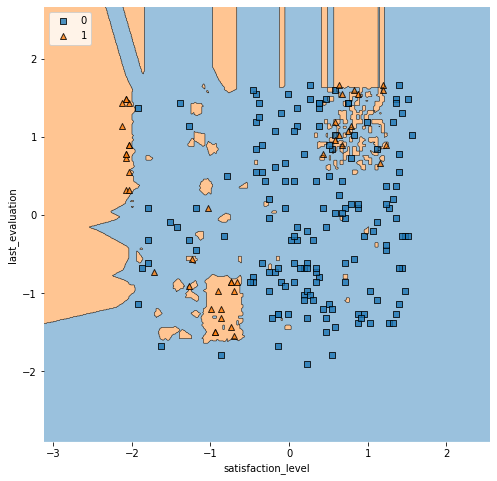

In [32]:
# Train the KNN classifier with n_neighbours = 3 and compute the accuracy and decision regions
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)
check_model_fit(knn, X_test_std, y_test)

### Discussion
There is an increase in accuracy with this model compared to the SVM model, but the decision region plot suggests overfitting.

**Indicators of overfitting apparent from the graph:**
- Hard, choppy decision boundaries.
- Small pockets yellow around the place.

**How to reduce overfitting**
We need to soften the decision boundary - we do this by increasing the number of nearest neighbours.

Let's try a KNN model with n_neighbors = 25.

total accuracy = 91.6%


predictions     
                   0    1
actual 0        3290  126
       1         254  830


percent accuracy score per class:
left = 0 : 96.31%
left = 1 : 76.57%



C:\Users\MateMalice\.conda\envs\machine-learning\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


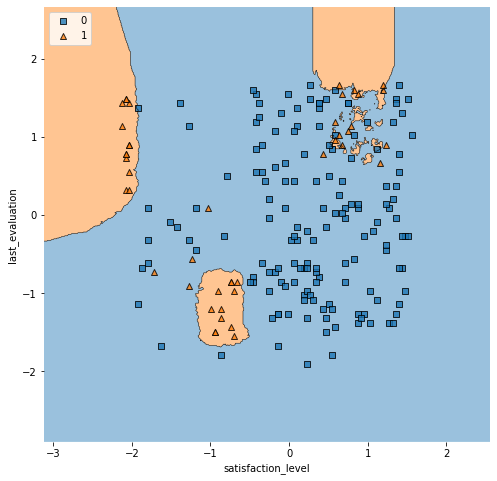

In [33]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_std, y_train)
check_model_fit(knn, X_test_std, y_test)

### Discussion
The decision boundaries are less choppy and there are fewer random pockets of yellow. The accuracy for the left class is less than the previous model's, but we would need to use a method like k-fold cross validation to decide if there's a significant difference between the models.

**Note**: Increasing n_neighbours does not affect training time (training just involves the model memorising the data), but does significantly increase prediction time. 


## Random Forest Training
We will try an ensemble model - random forest - with 50 decision trees and a max depth of five.

total accuracy = 92.4%


predictions      
                   0     1
actual 0        7911   101
       1         693  1794


percent accuracy score per class:
left = 0 : 98.74%
left = 1 : 72.14%



C:\Users\MateMalice\.conda\envs\machine-learning\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


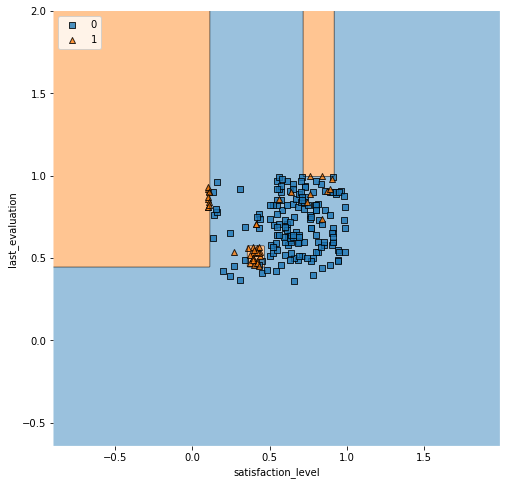

In [34]:
# Import and train the model - check the fit
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)
forest.fit(X_train, y_train)
check_model_fit(forest, X_train, y_train)

### Discussion
The decision boundaries are axis-parallel. Accuracy seems decent (compared to the previous models and noting that the data is uneven), but let's look at one of the decision trees to see what is happening. We can access the trees using the estimators_attribute of the model.

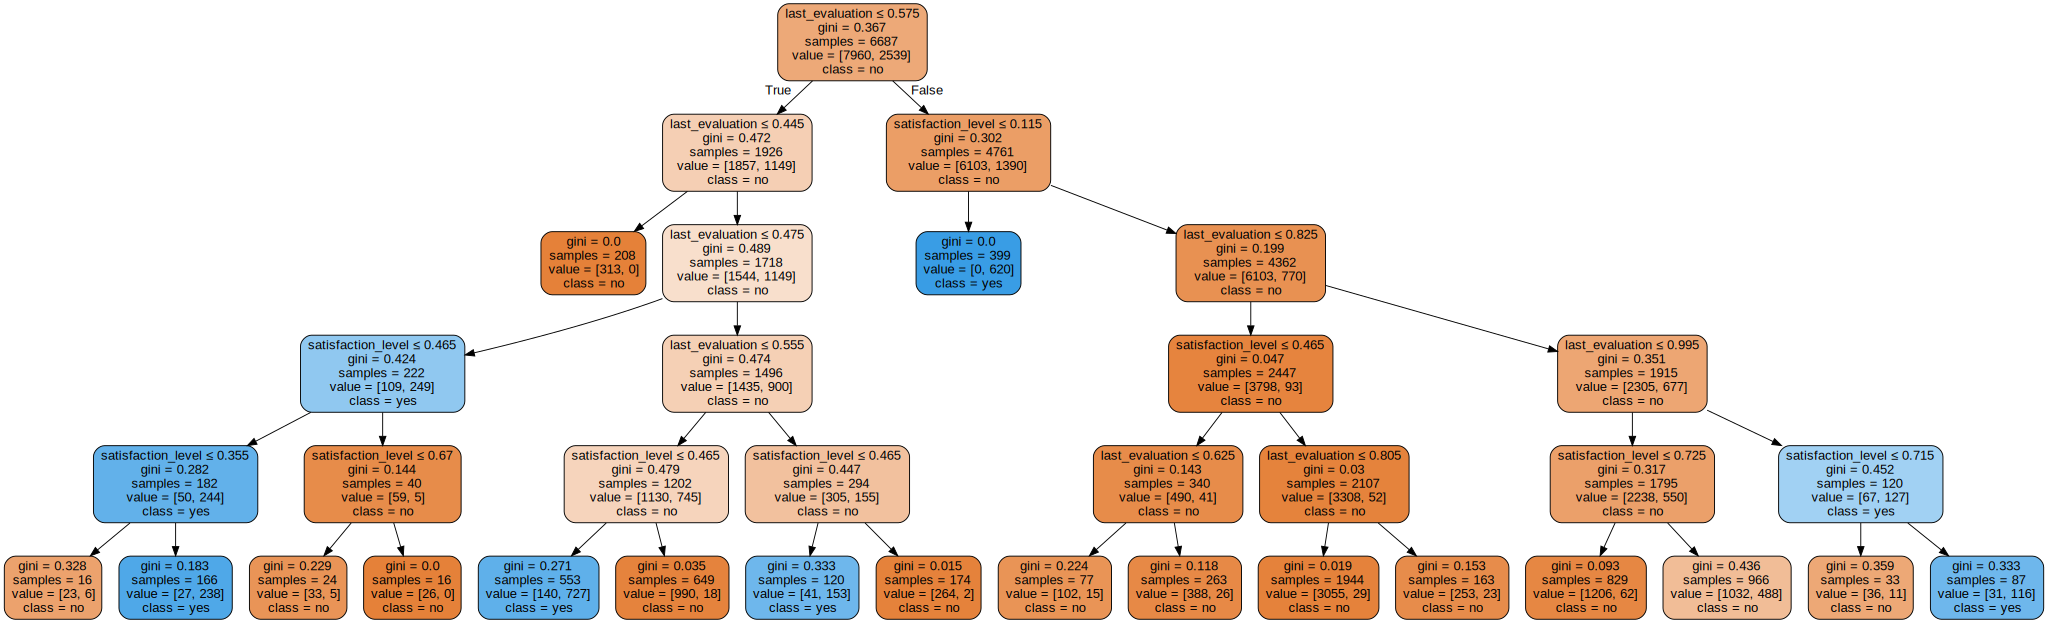

In [35]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(forest.estimators_[0], out_file=None, feature_names=features, class_names=['no', 'yes'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Discussion
Each path is limited to five nodes due to the depth setting. Orange boxes represent "no" predictions (i.e. has not left), whilst blue ones represent the "left" group (yes). The shade of each box is related to the "gini" value and represents the confidence level. Gini closer to zero represents higher confidence.

As discussed above re: random forests, this tree picks features at each step and makes a decision based on whether a condition is true or false. At the start, we check if last evaluation was less than 0.575 and split the samples based on that. For the samples with a higher last evaluation value, we check if satisfaction level is less than 0.115. If so, then a "yes" (i.e. left the company) decision is made - this has a gini value of zero, i.e. high confidence. We can see that last_evaluation <= 0.575 and satisfaction_level <= 0.115 is within the "left" decision boundary of the graph above. However, for a higher satisfaction_level than 0.115, a "no" decision is made but with a lower confidence level (0.199). This means that the process continues - again, the tree splits the data and makes decisions based on true/false conditions. This continues up to a depth of five.

The sklearn libraries automatically choose the splits that maximise information gain.

### 12 July 2020 - k fold cross-validation and validation curves
Today, I am going to use k-fold cross-validation to assess the accuracy of models. The point of this is to determine which model out of several performs better. K-fold cross-validation can be used to compare different algorithms or it can be used to tune hyperparameters for a single algorithm. For example, the C value for a SVM model or the number of neighbours in a KNN classifier can be tuned by comparing alternative possible values using k-fold cross-validation.

##### About k-fold cross-validation
In the examples above, we used a training set to train each model and then made predictions on test data. In each case, the same split of data was used for training and testing. K-fold cross-validation involves splitting the data into k "folds" of about equal size. We then use k-1 folds as training data for k models, with the remaining fold being used as test data. That way, each fold is used as test data (i.e. for validation) once. We calculate accuracy by getting the mean and standard deviation of the accuracy values for each fold result.

**When the best model has been identified, we retrain it using the entire dataset before using it to make predictions.**

#### Stratified k-fold cross-validation
sklearn allows us to use a method called "stratified k-fold cross-validation", which aims to even out the label population among the folds (i.e. so that the different labels are represented more equally among the different datasets). This reduces variance among the models and decreases the likelihood of bias due to unbalanced data.

#### Validation curves
Validation curves are simply plots of a training and validation metric as a function of a model parameter. These plots allow us to make parameter selections. The metric used in this example is the accuracy score. 

**More documentation for plot validation curves can be found in the [scikit-learn documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html)**

When reading these plots, we try and find the point with the highest validation score where the error bars between the training and cross-validation scores overlap. This is the optimal value for the parameter we are testing. 

**Important: When we're tuning a particular parameter, we need to keep the other parameters constant. Otherwise the curve is not valid. In other words, the plots only work for testing one variable individually.** For example, we might be tuning gamma for an SVM. We might decide on the optimal gamma value and then start tuning the C parameter. When we change the C value, though, then the gamma selection might no longer be optimal.

In [36]:
# First step: Reload the data, as we are using k-folds
# The previous part of the exercised used a train-test split that we're not using.
df = pd.read_csv('./hr_data_preprocessed.csv')
features = ['satisfaction_level', 'last_evaluation']
X = df[features].values
y = df.left.values

In [37]:
# Sanity check the data to make sure it's loaded correctly
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157.000000,3.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262.000000,6.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272.000000,4.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223.000000,5.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,160.163535,3.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [38]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
14994,0.40,0.57,2,151.0,3.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160.0,3.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143.0,3.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280.0,4.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14998,0.37,0.52,2,158.0,3.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [39]:
# Instantiate a random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5)

In [40]:
# Train ten variations of the classifier using stratified k-fold validation
# sklearn's cross_val_score does this type of validation by default
from sklearn.model_selection import cross_val_score
import numpy as np
np.random.seed(1)
scores = cross_val_score(
    estimator=clf,
    X=X,
    y=y,
    cv=10
)
print('accuracy = {:.3f} +/- {:.3f}'.format(scores.mean(), scores.std()))

accuracy = 0.923 +/- 0.005


In [41]:
# Note we used np.random.seed to set the random seed to ensure reproducibility.
# Let's check the accuracy for each individual fold by printing each score
print(scores)

[0.934      0.91533333 0.92266667 0.91866667 0.92133333 0.92866667
 0.91933333 0.92       0.928      0.92128085]


In [42]:
# This doesn't say anything about the accuracy with respect to each class
# To find this out, we can use the model_selection.StratifiedKFold class.
# We feed in the number of folds as an initialisation parameter.
# The split method is then used to build randomly-sampled "masks".
# A mask is an array containing the indices of items in another array, so we can get the items using data[mask]

from sklearn.model_selection import StratifiedKFold

# Define a custom function for determining the scores
def cross_val_class_score(clf, X, y, cv=10):
    kfold = StratifiedKFold(n_splits=cv)\
                .split(X, y)

    class_accuracy = []
    for k, (train, test) in enumerate(kfold):
        clf.fit(X[train], y[train])
        y_test = y[test]
        y_pred = clf.predict(X[test])
        cmat = confusion_matrix(y_test, y_pred)
        class_acc = cmat.diagonal()/cmat.sum(axis=1)
        class_accuracy.append(class_acc)
        print('fold: {:d} accuracy: {:s}'.format(k+1, str(class_acc)))
        
    return np.array(class_accuracy)

In [43]:
# Run it
np.random.seed(1)
scores = cross_val_class_score(clf, X, y)

print('accuracy = {} +/- {}'.format(scores.mean(axis=0), scores.std(axis=0)))

fold: 1 accuracy: [0.99124343 0.75139665]
fold: 2 accuracy: [0.98950131 0.67787115]
fold: 3 accuracy: [0.98950131 0.70868347]
fold: 4 accuracy: [0.98600175 0.70308123]
fold: 5 accuracy: [0.98512686 0.71708683]
fold: 6 accuracy: [0.9816273  0.75910364]
fold: 7 accuracy: [0.98862642 0.69747899]
fold: 8 accuracy: [0.9816273  0.72268908]
fold: 9 accuracy: [0.9903762  0.72829132]
fold: 10 accuracy: [0.98861646 0.70588235]
accuracy = [0.98722483 0.71715647] +/- [0.00330013 0.02326823]


### Discussion
From this we can see that again, the accuracy for the "left" group is consistently less - again, not surprising given the unbalanced data.

#### Plotting a validation curve for max_depth
We want to find the optimal value for a parameter - for this example, we will draw the curve for max_depth.

In [44]:
from sklearn.model_selection import validation_curve
clf = RandomForestClassifier(n_estimators=10)
max_depths = np.arange(3, 16, 3)
train_scores, test_scores = validation_curve(
    estimator=clf,
    X=X,
    y=y,
    param_name='max_depth',
    param_range=max_depths,
    cv=10
)

In [45]:
# Function to draw the validation curve
import seaborn as sns
import matplotlib.pyplot as plt

def plot_validation_curve(train_scores, test_scores,
                          param_range, xlabel='', log=False):
    '''
    This code is from the scikit-learn docs:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    
    See also here for sample code for hyperparameter tuning and model evaluation best practices:
    https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch06/ch06.ipynb
    '''
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    fig = plt.figure()
    
    plt.plot(param_range, train_mean, 
             color=sns.color_palette('Set1')[1], marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, alpha=0.15,
                     color=sns.color_palette('Set1')[1])

    plt.plot(param_range, test_mean, 
             color=sns.color_palette('Set1')[0], linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(param_range, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color=sns.color_palette('Set1')[0])

    if log:
        plt.xscale('log')
    plt.legend(loc='lower right')
    if xlabel:
        plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.ylim(0.9, 1.0)

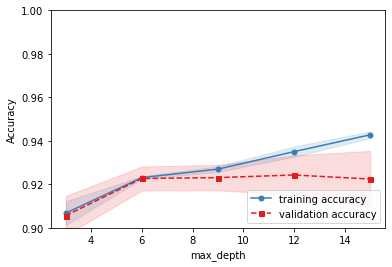

In [46]:
# Run the function
plot_validation_curve(train_scores, test_scores, max_depths, xlabel='max_depth')

### Discussion
Setting the max depth for a decision tree limits overfitting - we can see this in the validation curve, where max_depth values above 6 show a lower validation accuracy than training accuracy. When max_depth is lower than 6, the model is underfitting the data.

We used two techniques here to evaluate model accuracy: we used k-fold cross-validation to calculate the average accuracy and standard deviation. This allows us to gauge the variability of the model. We also used a validation curve to find the optimal value for a parameter - the curve shows the point at which overfitting is occurring.

### Dimensionality reduction
The final part of this exercise involves building the predictive model for the employee retention problem. However, we will improve the accuracy of the model by including all the features from the dataset, rather than just employee satisfaction and the last evaluation values. This requires dimensionality reduction, as there are many features.

**A simple dimensionality reduction technique involves removing unimportant features. However, this requires us to drop data. More advanced methods exist, like *principal component analysis* and *linear discriminant analysis*.**

Instead of completely dropping data, these techniques involve compressing data where important information from several features can be encoded in fewer features.

**This example focuses on PCA.**

#### Principal Component Analysis
This technique transforms data by projecting it into a new subspace of orthogonal "principal components", where the components with the highest eigenvalues encode the most important information. We then select a few of these components and use these to train our model instead of the original high-dimensional dataset.

##### Example: PCA and images
We could use PCA to encode the information from every pixel in an image. Here, the original feature space would have dimensions equal to the number of pixels (e.g. a 10x10 image would have 100 pixels, so 100 features). We could reduce this with PCA to fewer features, which saves time and also eliminates noise by compressing less relevant data. With data such as images (that can get pretty big), these performance savings can be significant.

### Plan for the last part of this exercise
Remember the aim was to develop a model for predicting whether an employee is likely to leave the company. We were able to make predictions with 90% overall accuracy, but the accuracy was much lower for predictions for the "left" class.

We will see if this can be improved by using the whole feature space. We will train a model both on the full feature space and on the features with PCA dimensionality reduction applied so that we can compare them.

In [47]:
# Get the full list of all features
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [48]:
# Declare an array holding the feature names except our target ('left').
features = []
for c in df.columns:
    if c != 'left':
        features.append(c)
print(features)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'promotion_last_5years', 'department_IT', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical', 'salary_high', 'salary_low', 'salary_medium']


In [49]:
# Define X and y
X = df[features].values
y = df.left.values

### Why we are using random forests for this
When looking at the data for the features, we can see we have a mix of data types. Satisfaction level and last evaluation contain continuous data, which was used to train the models above. However, we also have some discrete features, such as number_project. Finally, there are binary fields such as work_accident and promotion_last_5years and binary features like department_IT, department_accounting ... department_x that we created using one-hot encoding. 

Random forests are good for feature mixes like this. They're compatible with feature sets composed of both continuous and discrete data. Though SVMs and KNNs can be trained on mixed data too, it requires preprocessing.

[**Link to StackExchange answer discussing data-scaling prescription, which can be used to preprocess mixed feature type data for SVM and KNN classifiers**](https://stats.stackexchange.com/questions/82923/mixing-continuous-and-binary-data-with-linear-svm/83086#83086)

Essentially, the preprocessing approach involves:
- Standardising continuous variables.
- One-hot-encoding categorical features.
- Shifting binary values to -1 and 1 instead of 0 and 1.
Mixed feature data can then train many classification models. 

#### First step: find out the best parameters for our model
We will use a validation curve to tune max_depth. We will use 10 models and set k to 5, so we get five estimates for the accuracy of each model. 

In [50]:
%%time
import numpy as np
np.random.seed(1)
clf = RandomForestClassifier(n_estimators=20)
max_depths = [3, 4, 5, 6, 7, 9, 12, 15, 18, 21]
train_scores, test_scores = validation_curve(
    estimator=clf,
    X=X,
    y=y,
    param_name='max_depth',
    param_range=max_depths,
    cv=5
);

Wall time: 4.96 s


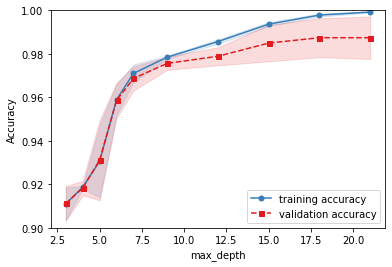

In [51]:
# Plot the validation curve
plot_validation_curve(train_scores, test_scores, max_depths, xlabel='max_depth')

In [52]:
# It looks like the optimal max_depth is around 6 - above this, overfitting occurs.
# We will do the same thing for n_estimators
np.random.seed(1)
clf = RandomForestClassifier(max_depth=6)
n_estimator_range = [10, 20, 40, 80, 120, 160, 200, 250, 300, 400]
train_scores, test_scores = validation_curve(
    estimator=clf,
    X=X,
    y=y,
    param_name='n_estimators',
    param_range=n_estimator_range,
    cv=5
);

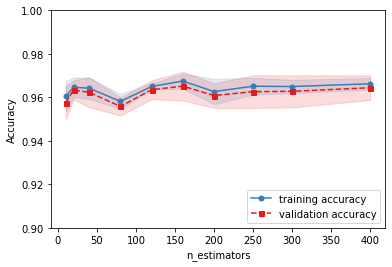

In [53]:
# Plot the curve
plot_validation_curve(train_scores, test_scores, n_estimator_range, xlabel='n_estimators')

**Note:** For random forests, it's usually better to use more decision tree estimators, but this takes more time. 

We can see from the plots that for a range between 10 and 400, there is little difference, but we get a decent accuracy at 150, so we will use that to train our model.

In [54]:
# Use cross_val_class_score to test the model, a random forest with max_depth=6 and n_estimators=200
np.random.seed(1)
clf = RandomForestClassifier(n_estimators=150, max_depth=6)
scores = cross_val_class_score(clf, X, y)
print('accuracy = {} +/- {}'.format(scores.mean(axis=0), scores.std(axis=0)))

fold: 1 accuracy: [0.99824869 0.89664804]
fold: 2 accuracy: [0.99825022 0.83753501]
fold: 3 accuracy: [0.99475066 0.8487395 ]
fold: 4 accuracy: [0.99387577 0.78991597]
fold: 5 accuracy: [0.99562555 0.83193277]
fold: 6 accuracy: [0.99300087 0.84593838]
fold: 7 accuracy: [0.99562555 0.88795518]
fold: 8 accuracy: [0.99650044 0.8487395 ]
fold: 9 accuracy: [0.99475066 0.90196078]
fold: 10 accuracy: [0.99649737 0.90756303]
accuracy = [0.99571258 0.85969282] +/- [0.00163405 0.03578005]


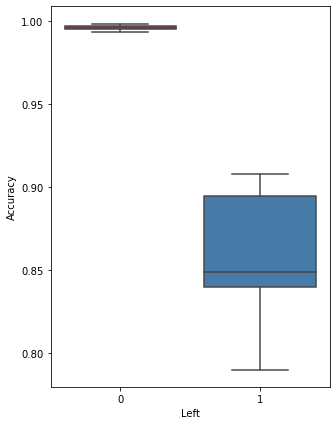

In [55]:
# Using all the features produces higher accuracy. Let's draw a box plot to visualise it
fig = plt.figure(figsize=(5, 7))
sns.boxplot(data=pd.DataFrame(scores, columns=[0,1]), palette=sns.color_palette('Set1'))
plt.xlabel('Left')
plt.ylabel('Accuracy')
plt.show()

### Discussion
Note that the accuracy for the "remained" category is consistently high - small distribution close to 1. The accuracy for "left" is still lower, but the average is around 85% and the lowest accuracy is around 78% - much better than what we were getting before.

**Random forests can provide an estimate of feature importance.** Scikit-learn calculates feature importance based on how the node impurity changes with respect to each feature. See [this StackOverflow thread](https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined). In short, it uses "gini importance" or "mean decrease impurity" - the total decrease in node impurity weighted by the probability of reaching that node averaged over all trees of the ensemble. 

Text(0.5, 0, 'Feature importance')

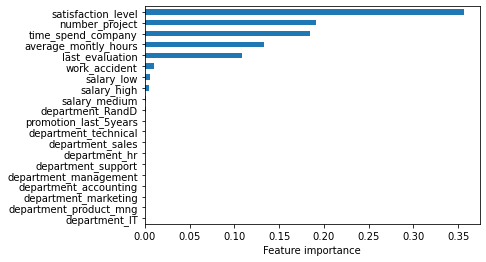

In [56]:
# Plot the feature importance as calculated by scikit-learn
pd.Series(clf.feature_importances_, name='Feature importance', index=df[features].columns).sort_values().plot.barh()
plt.xlabel('Feature importance')

### Discussion
The one-hot-encoded variables (i.e. department and salary) aren't giving much value, nor is work_accident or promotion_last_5years. We will use PCA to condense these features into a few principal components.

In [57]:
# First, grab the features with low importance
importances = list(pd.Series(clf.feature_importances_, index=df[features].columns).sort_values(ascending=False).index)
np.array(importances[5:])

array(['work_accident', 'salary_low', 'salary_high', 'salary_medium',
       'department_RandD', 'promotion_last_5years',
       'department_technical', 'department_sales', 'department_hr',
       'department_support', 'department_management',
       'department_accounting', 'department_marketing',
       'department_product_mng', 'department_IT'], dtype='<U22')

In [58]:
# Import the PCA class and transform the features
from sklearn.decomposition import PCA

pca_features = ['work_accident', 'salary_low', 'salary_high', 'salary_medium',
       'promotion_last_5years', 'department_RandD', 'department_hr',
       'department_technical', 'department_support',
       'department_management', 'department_sales',
       'department_accounting', 'department_IT', 'department_product_mng',
       'department_marketing']
X_reduce = df[pca_features]
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_reduce)

In [59]:
# Print X_pca - we should get 3 vectors as we  asked for the top 3 components
X_pca

array([[-0.67733089,  0.75837169, -0.10493685],
       [ 0.73616575,  0.77155888, -0.11046422],
       [ 0.73616575,  0.77155888, -0.11046422],
       ...,
       [-0.67157059, -0.3337546 ,  0.70975452],
       [-0.67157059, -0.3337546 ,  0.70975452],
       [-0.67157059, -0.3337546 ,  0.70975452]])

In [60]:
# Add the new features to our DataFrame.
df['first_principal_component'] = X_pca.T[0]
df['second_principal_component'] = X_pca.T[1]
df['third_principal_component'] = X_pca.T[2]

In [61]:
# Train a new Random Forest using our reduced-dimension feature set
features = ['satisfaction_level', 'number_project', 'time_spend_company', 'average_montly_hours', 'last_evaluation', 'first_principal_component', 'second_principal_component', 'third_principal_component']
X = df[features].values
y = df.left.values

In [62]:
# Assess the model's accuracy with k-fold cross validation
# We use the same code as before, but X now points to the reduced set of features
np.random.seed(1)
clf = RandomForestClassifier(n_estimators=150, max_depth=6)
scores = cross_val_class_score(clf, X, y)
print('accuracy = {} +/- {}'.format(scores.mean(axis=0), scores.std(axis=0)))

fold: 1 accuracy: [0.99737303 0.91340782]
fold: 2 accuracy: [0.99825022 0.87955182]
fold: 3 accuracy: [0.99737533 0.89915966]
fold: 4 accuracy: [0.99300087 0.91036415]
fold: 5 accuracy: [0.99300087 0.88795518]
fold: 6 accuracy: [0.99562555 0.90196078]
fold: 7 accuracy: [0.99737533 0.92436975]
fold: 8 accuracy: [0.99387577 0.89635854]
fold: 9 accuracy: [0.99475066 0.92436975]
fold: 10 accuracy: [0.99562172 0.91316527]
accuracy = [0.99562493 0.90506627] +/- [0.00183497 0.01404501]


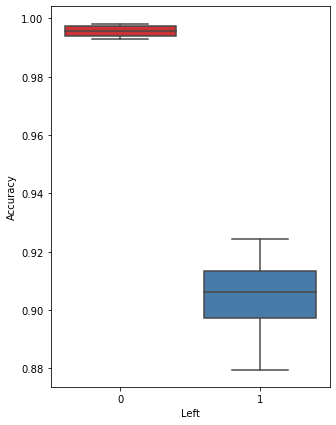

In [63]:
# Visualise using a box plot
fig = plt.figure(figsize=(5, 7))
sns.boxplot(data=pd.DataFrame(scores, columns=[0,1]), palette=sns.color_palette('Set1'))
plt.xlabel('Left')
plt.ylabel('Accuracy')
plt.show()

### Discussion
Compared to the previous result, the accuracy for class 1 ("left") is improved - more than half of the validation sets return accuracy of >90%. We will use this as our final model, as it has the best accuracy. Before dimensionality reduction, average accuracy was about 86%.

In [64]:
# Train the final model
np.random.seed(1)
clf = RandomForestClassifier(n_estimators=150, max_depth=6)
clf.fit(X, y)

RandomForestClassifier(max_depth=6, n_estimators=150)

In [65]:
# Save the trained model to a binary file
import joblib
joblib.dump(clf, 'random-forest-trained-employee-retention-problem.pkl')

['random-forest-trained-employee-retention-problem.pkl']

In [66]:
# Try loading the model
clf = joblib.load('random-forest-trained-employee-retention-problem.pkl')

### Use the model
We will use the model to predict whether an employee - who we will call Sandra - is likely to leave. She has been working long hours and reported low satisfaction. We will take her data from the training set, but pretend that it's unseen data (this is just an example - in real life, we would be using actual unseen data).

In [67]:
# List the feature values
sandra = df.iloc[573]
X = sandra[features]
X

satisfaction_level              0.360000
number_project                  2.000000
time_spend_company              3.000000
average_montly_hours          148.000000
last_evaluation                 0.470000
first_principal_component       0.742801
second_principal_component     -0.514568
third_principal_component      -0.677421
Name: 573, dtype: float64

In [68]:
# Predict whether Sandra will leave - first, run the classification
clf.predict([X])

array([1], dtype=int64)

In [69]:
# The model predicts that she has already left. 
# We can calculate the probabilities of each class label.
clf.predict_proba([X])

array([[0.07197009, 0.92802991]])

In [70]:
# Let's try reducing her hours to 100, her number of projects to 1 and the time she spends at the company to 1
X.average_montly_hours = 100
X.number_project = 1
X.time_spend_company = 1
clf.predict_proba([X])

array([[0.62221839, 0.37778161]])

### Summary
This example demonstrates how data-driven decisions can be made by training models and making predictions using them. 

This exercise demonstrates the following (broad) things:
- How to plan a machine learning strategy
- How to prepare and clean data so that it can be used for ML using sklearn and pandas
- How to use sklearn to train 3 different classifiers - SVMs, KNN and random forests
- How to identify overfitting from decision region plots
- How to test the accuracy of models using k-fold cross-validation
- How to tune model hyperparameters using validation curves
- Dimensionality reduction for improving model performance
- How to use trained models to make data-driven decisions.